# <span style='font-family:"Times New Roman"'><font color='Darkblue'> **Stress and Anxiety in Reddit**

<img src = "https://static01.nyt.com/images/2019/10/15/science/15WELLSTRESS/15WELLSTRESS-superJumbo.jpg" width=70%>

#### <span style='font-family:"Times New Roman"'><font size="2.5">
Recognized as a form of a mental illness, anxiety is defined by the NHS as "a feeling of unease, such as worry or fear, that can be mild or severe". Anxiety disorders are the most common of mental disorders and affect nearly 30% of adults at some point in their lives. Previous studies have suggested that there is a rise of use social media use when individuals feel anxious and distressed. And it has become clear that this use of social media can provide researchers with a better understanding of the seeking and sharing nature of humans, and more importantly play a vital part in the process of diagnosing and assisting people with anxiety. <br /> For this purpose, I have decided to analyze the text data gathered from anxiety threads on Reddit, and classify the posts that infer anxiety. The dataset has been vectorized through both BERT and TF-IDF, with the latter being used for the Logistic Regression, KNN, Decision Trees, Random Forest, SVM, Naive Bayes, Gaussian Bayes, XGBoost, GBM, and Adaboost models.

In [1]:
#By Ysmin-g
#The dataset studied here can be accessed and downloaded via Kaggle

### <span style='font-family:"Times New Roman"'><font color='Darkblue'> Importing the required libraries

In [2]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import re
import string
import emoji

from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer


from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score

import tensorflow_hub as hub
import tensorflow_text as text

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image

In [3]:
#importing the libraries of the ml models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import cross_val_score

In [4]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### <span style='font-family:"Times New Roman"'><font color='Darkblue'> Importing and reading the dataset

In [6]:
#importing the dataset
dr_train=pd.read_csv('/content/dreaddit-train.csv')
dr_test=pd.read_csv('/content/dreaddit-test.csv')
dr_train.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [7]:
dr_train.shape

(2838, 116)

In [8]:
dr_test.label.unique()

array([0, 1])

In [9]:
#getting the list of the columns
dr_train_cols=list(dr_train.columns)
#to get the list of columns, exit the line
# below from its comment format
#dr_train_cols

In [10]:
#removing the ids of posts and users for privacy 
#and removing some social details 
dr_train.drop(['post_id','id','social_num_comments','syntax_fk_grade',
               'social_upvote_ratio','social_timestamp','sentence_range'],axis=1,inplace=True)
dr_test.drop(['post_id','id','social_num_comments','syntax_fk_grade',
              'social_upvote_ratio','social_timestamp','sentence_range'],axis=1,inplace=True)

In [11]:
#dropping duplicate values in the train dataset
dr_train=dr_train.drop_duplicates('text',keep='first')

In [12]:
#getting the data types of the columns
dr_train.dtypes

subreddit                    object
text                         object
label                         int64
confidence                  float64
social_karma                  int64
                             ...   
lex_dal_min_imagery         float64
lex_dal_avg_activation      float64
lex_dal_avg_imagery         float64
lex_dal_avg_pleasantness    float64
sentiment                   float64
Length: 109, dtype: object

In [13]:
dr_train.describe()

,label,confidence,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,...,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,sentiment
count,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,...,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,0.525532,0.808389,18.325177,4.657070,85.992908,35.076589,40.761440,67.221163,33.240929,18.181589,...,2.797142,2.705298,2.948511,1.087800,1.119954,1.000213,1.722762,1.536282,1.879344,0.040667
std,0.499436,0.177099,79.665247,3.285912,32.312448,26.378990,31.468798,32.789835,35.268240,9.530092,...,0.162129,0.174503,0.126013,0.117265,0.084909,0.006521,0.047732,0.102962,0.058969,0.195670
min,0.000000,0.428571,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,1.000000,2.400000,...,2.000000,1.857100,2.000000,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,-1.000000
25%,0.000000,0.600000,2.000000,2.446481,65.000000,12.410000,12.067500,41.847500,1.367500,13.400000,...,2.714300,2.625000,3.000000,1.000000,1.000000,1.000000,1.691770,1.469458,1.841788,-0.072637
50%,1.000000,0.800000,5.000000,4.292475,81.000000,29.290000,33.430000,80.920000,22.480000,16.750000,...,2.800000,2.700000,3.000000,1.000000,1.142900,1.000000,1.721600,1.530430,1.878250,0.044358
75%,1.000000,1.000000,10.000000,6.473155,101.000000,54.710000,68.970000,96.215000,60.880000,21.000000,...,3.000000,2.857100,3.000000,1.142900,1.142900,1.000000,1.751720,1.596150,1.916205,0.166667
max,1.000000,1.000000,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,99.000000,233.000000,...,3.000000,3.000000,3.000000,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000


In [14]:
dr_train.isnull().values.any()

False

### <span style='font-family:"Times New Roman"'><font color='Darkblue'> Exploring the dataset

In [15]:
#data distribution of subreddits 

train_r=pd.DataFrame(dr_train['subreddit'].value_counts(normalize=False))
train_r=train_r.reset_index().rename(columns = {'index':'subreddit','subreddit':'Count'})

fig = go.Figure(data=[go.Pie(labels=train_r['subreddit'], values=train_r['Count'],textinfo='label',
                     name='Subreddits')])
fig.update_layout(title_text='Subreddit Distribution')
fig.show()

In [16]:
#getting the spread of the labels in the train dataset
train_l=pd.DataFrame(dr_train['label'].value_counts(normalize=False))
train_l

,label
1,1482
0,1338


### <span style='font-family:"Times New Roman"'><font color='Darkblue'> Cleaning the dataset

In [17]:
#merging both datasets for cleaning
dr = pd.concat([dr_test.assign(ind="test"), dr_train.assign(ind="train")])

In [18]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text) #remove punctuation characters
    text= re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip() #remove single letter words
    text=emoji.replace_emoji(text, replace='') #remove emoji
    text = re.sub(r"[(+*)]\S*https?:\S*[(+*)]", "", text) #remove https links
    text= re.sub('http://\S+|https://\S+', " ", text) #remove https links with no brackets
    text=re.sub("\s\s+" , " ", text) #remove extra spaces
    return text.lower()

In [19]:
dr['cleaned text']=dr['text'].apply(lambda x: clean_text(x))
dr['cleaned text'][0]

0    its like that if you want or not me have no pr...
0    he said he had not felt that way before sugget...
Name: cleaned text, dtype: object

In [20]:
dr['subreddit'].unique()

array(['relationships', 'anxiety', 'ptsd', 'assistance', 'homeless',
       'almosthomeless', 'domesticviolence', 'survivorsofabuse', 'stress',
       'food_pantry'], dtype=object)

In [21]:
#encoding the subreddits values 
le =preprocessing.LabelEncoder()
dr['subreddit'] = le.fit_transform(dr['subreddit'])
sub_r_map = dict(zip(le.classes_, range(len(le.classes_))))
sub_r_map

{'almosthomeless': 0,
 'anxiety': 1,
 'assistance': 2,
 'domesticviolence': 3,
 'food_pantry': 4,
 'homeless': 5,
 'ptsd': 6,
 'relationships': 7,
 'stress': 8,
 'survivorsofabuse': 9}

### <span style='font-family:"Times New Roman"'><font color='Darkblue'> Separating the dataset after cleaning

In [22]:
#separating the dataset
test, train = dr[dr["ind"].eq("test")], dr[dr["ind"].eq("train")]

#### <span style='font-family:"Times New Roman"'><font color='Darkblue'><font size="3"> As it can be seen, this dataset includes other information regarding the reddit posts, but for this analysis, I have chosen to work with only the text of the posts in the dataset. Therefore I will proceed to only keep the columns that would benefit the text analysis and classification task.

In [23]:
train=train[['cleaned text','label','subreddit']]
test=test[['cleaned text','label','subreddit']]

### <span style='font-family:"Times New Roman"'><font color='Darkblue'> Exploring the processed texts in our train dataset

#### <span style='font-family:"Times New Roman"'><font color='Darkblue'><font size="3"> Getting the word clouds of the cleaned dataset: Here I have attempted to plot the word clouds of the top three subreddits and the train dataset. Please note that I have not removed the stopwords or performed lemmatization, since I wanted the whole corpus to be studied and thought it could be interesting.

In [24]:
#plotting the word cloud of the entire dataset
def word_cl(dta,name):
    dtb=dta.to_string()
    cloud_image = "/content/head.png"
    mask = np.array(Image.open(cloud_image))
    wcloud = WordCloud(min_font_size=10, 
                       mask=mask,
                       height=3000,colormap="YlGnBu",
                       background_color="black").generate(dtb)
    plt.figure(figsize=(16,8) )
    plt.imshow(wcloud, interpolation='bilinear')
    plt.tight_layout(pad=0)
    plt.title(name)
    plt.axis("off")
    plt.show()

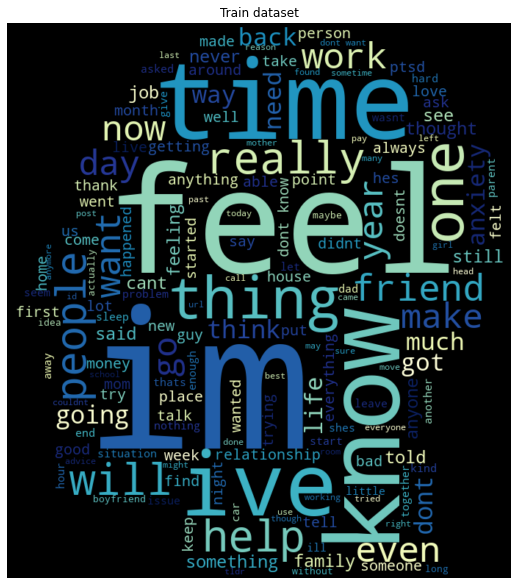

In [25]:
#plotting the word cloud of the entire dataset
word_cl(train,"Train dataset")

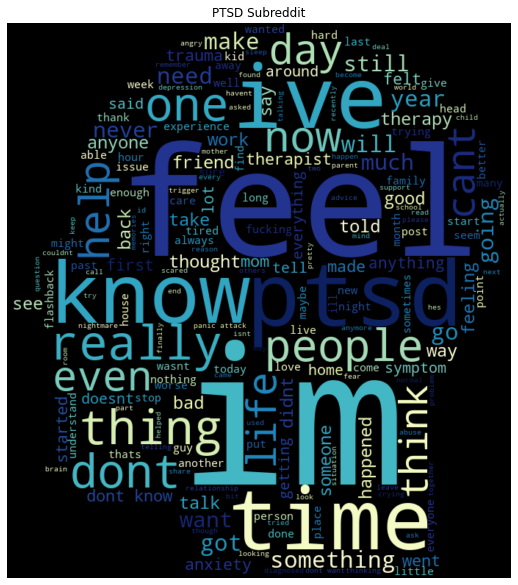

In [26]:
#plotting the word cloud of the top 3 subreddits including 
#the majority of the data in the dataset
top3=['ptsd','relationships','anxiety']

wcl_ptsd=word_cl(train[train['subreddit']==6],'PTSD Subreddit')

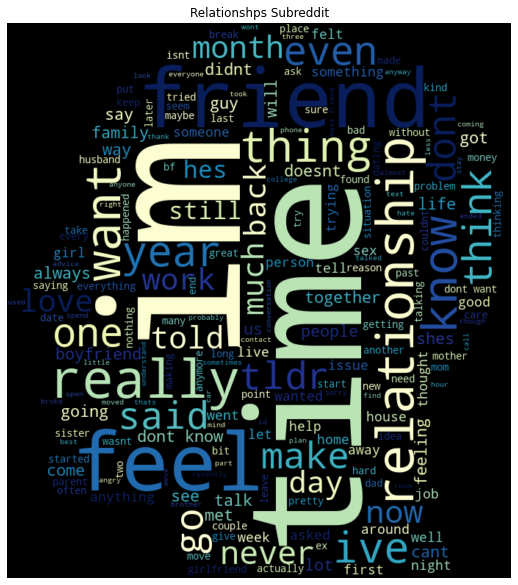

In [27]:
wcl_ptsd=word_cl(train[train['subreddit']==7],'Relationshps Subreddit')

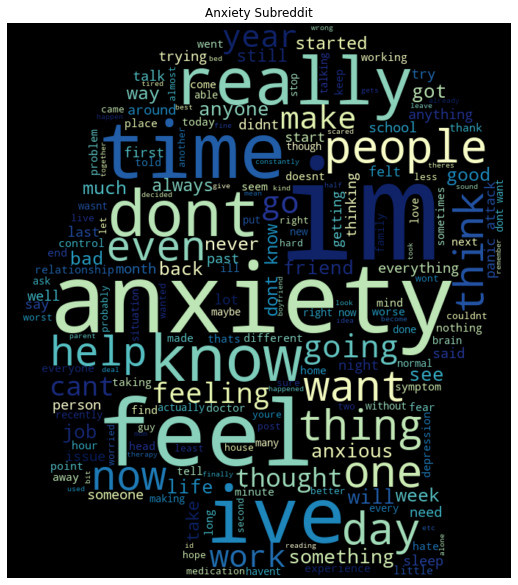

In [28]:
wcl_ptsd=word_cl(train[train['subreddit']==1],'Anxiety Subreddit')

### <span style='font-family:"Times New Roman"'><font color='Darkblue'> Defining X and y values

In [29]:
#for the purpose of this data, only the text column of the dataset is going to be analyzed

In [30]:
X_train = train['cleaned text'].values
y_train = train['label'].values

X_test = test['cleaned text'].values
y_test = test['label'].values

## <span style='font-family:"Times New Roman"'><font color='SteelBlue1'>**Using TF-IDF for Classification**

#### <span style='font-family:"Times New Roman"'><font color='SteelBlue1'> Removing stopwords and lemmatizing the dataset

In [31]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words("english"))

In [32]:
#for these models, we would have to add lemmatization and stopwords removal
def lem_rem(text):
  text = text.split()
  text = [lemmatizer.lemmatize(word) for word in text if not word in set(stop_words)]
  text = ' '.join(text)
  return text

In [33]:
#defining a new dataframe for the purpose
dr_ml=dr.copy()
dr_ml['cleaned text']=dr['cleaned text'].apply(lem_rem)


In [34]:
dr_ml.head()

,subreddit,text,label,confidence,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,sentiment,ind,cleaned text
0,7,"Its like that, if you want or not.“ ME: I have...",0,0.8,22,-1.238793,55,2.82,57.22,55.41,...,2.6,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.000000,test,like want problem take longer asked friend hel...
1,1,I man the front desk and my title is HR Custom...,0,1.0,5,7.684583,72,64.56,50.00,31.19,...,3.0,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,-0.065909,test,man front desk title hr customer service repre...
2,6,We'd be saving so much money with this new hou...,1,1.0,10,2.360408,148,14.79,75.05,62.88,...,3.0,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,-0.036818,test,wed saving much money new housrits expensive c...
3,6,"My ex used to shoot back with ""Do you want me ...",1,0.5,5,5.997000,100,32.13,38.19,79.76,...,2.8,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,-0.066667,test,ex used shoot back want go time matter almost ...
4,7,I haven’t said anything to him yet because I’m...,0,0.8,138,4.649418,78,4.96,50.00,71.23,...,3.0,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.141667,test,havent said anything yet im sure someone would...


#### <span style='font-family:"Times New Roman"'><font color='SteelBlue1'> Separating the recently cleaned dataset

In [35]:
#separating the dataset and getting new values of train and test
test_ml, train_ml = dr_ml[dr_ml["ind"].eq("test")], dr_ml[dr_ml["ind"].eq("train")]

In [36]:
train_ml=train_ml[['cleaned text','label']]
test_ml=test_ml[['cleaned text','label']]

#### <span style='font-family:"Times New Roman"'><font color='SteelBlue1'> Defining X, y from the recently separated dataset

In [37]:
#getting new values of x and y
X_train_ml = train_ml['cleaned text'].values
y_train_ml = train_ml['label'].values

X_test_ml = test_ml['cleaned text'].values
y_test_ml = test_ml['label'].values

#### <span style='font-family:"Times New Roman"'><font color='SteelBlue1'> Tokenizing the data

In [38]:
#tokenizing the data
tfidf_vectorizer = TfidfVectorizer()

X_train_tf = tfidf_vectorizer.fit_transform(X_train_ml)
X_test_tf = tfidf_vectorizer.transform(X_test_ml)

#### <span style='font-family:"Times New Roman"'><font color='SteelBlue1'> Defining the models

In [39]:
def cl_models():
    
    model = dict()
    model['Linear Reg'] = LogisticRegression()
    model['KNN'] = KNeighborsClassifier()
    model['Decision Tree'] = DecisionTreeClassifier(criterion = 'entropy',random_state=1)
    model['Random Forest'] = RandomForestClassifier(criterion = 'entropy', random_state = 1)
    model['SVM'] = SVC()
    model['Naive Bayes']=MultinomialNB()
    model['Gaussian Bayes'] = GaussianNB()
    model['XGBoost'] = XGBClassifier()
    model['GBM'] = GradientBoostingClassifier()
    model['Adaboost'] = AdaBoostClassifier()
    
    return model

In [40]:
#since most the ml models cannot work with a sparse matrix and require an array
X_train_tf2=X_train_tf.toarray()
X_test_tf2=X_test_tf.toarray()

#### <span style='font-family:"Times New Roman"'><font color='SteelBlue1'> Getting the results of the models defined through TF-IDF

In [41]:
#getting the results
# get the models to evaluate
re = {}

models = cl_models()
# evaluate the models and store results

for name, model in models.items():
    model.fit(X_train_tf2, y_train_ml)
    y_pred= model.predict(X_test_tf2)
    accuracy= accuracy_score(y_test_ml, y_pred)
    re[name]=accuracy

results=pd.DataFrame(re.items(),columns=['Model','Accuracy Score'])
results.set_index('Model', inplace=True)
print("-----The Accuracy scores for the models-----")
results['Accuracy Score'] = results['Accuracy Score'].apply(lambda x: float("{:.2f}".format(x)))
print(results)

-----The Accuracy scores for the models-----
                Accuracy Score
Model                         
Linear Reg                0.73
KNN                       0.66
Decision Tree             0.58
Random Forest             0.70
SVM                       0.71
Naive Bayes               0.66
Gaussian Bayes            0.58
XGBoost                   0.70
GBM                       0.69
Adaboost                  0.69


#### <span style='font-family:"Times New Roman"'><font color='DarkSlateBlue'>**The Bert Classification Model** 

#### <span style='font-family:"Times New Roman"'><font color='DarkSlateBlue'> Preprocessing and Encoding the primary cleaned dataset 

In [42]:

preprocess_URL="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_URL="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

b_preprocessor = hub.KerasLayer(preprocess_URL, name='Preprocess')
b_encoder = hub.KerasLayer(encoder_URL,name='Encode')

In [48]:
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='Text')
preprocessed_text = b_preprocessor(text_input)
output=b_encoder(preprocessed_text)

n= tf.keras.layers.Dropout(0.1,name='Initial_Dropout')(output['pooled_output'])
n = tf.keras.layers.Dense(1, activation='sigmoid',name="Classify")(n)
nmodel=tf.keras.Model(inputs=[text_input], outputs=[n])

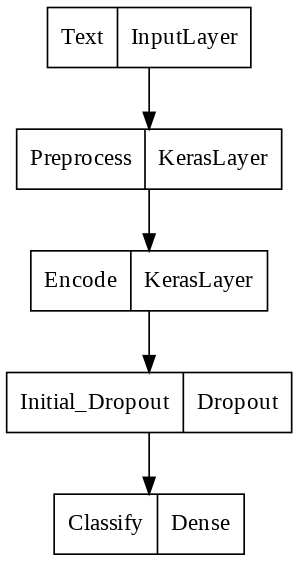

In [49]:
tf.keras.utils.plot_model(nmodel, rankdir='TB', dpi=120)

In [50]:
metrics = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')]

nmodel.compile(optimizer='adam',loss='binary_crossentropy', metrics=metrics)

#### <span style='font-family:"Times New Roman"'><font color='DarkSlateBlue'> Fitting the model and getting the accuracy, precision, and recall scores in each epoch

In [46]:
nmodel.fit(X_train,y_train, epochs=10)

Epoch 1/10
89/89 [==============================] - 36s 300ms/step - loss: 0.6813 - accuracy: 0.5745 - precision: 0.5848 - recall: 0.6559
Epoch 2/10
89/89 [==============================] - 27s 304ms/step - loss: 0.6450 - accuracy: 0.6255 - precision: 0.6249 - recall: 0.7193
Epoch 3/10
89/89 [==============================] - 27s 308ms/step - loss: 0.6221 - accuracy: 0.6631 - precision: 0.6616 - recall: 0.7348
Epoch 4/10
89/89 [==============================] - 28s 309ms/step - loss: 0.5986 - accuracy: 0.6986 - precision: 0.6936 - recall: 0.7638
Epoch 5/10
89/89 [==============================] - 28s 312ms/step - loss: 0.5891 - accuracy: 0.7018 - precision: 0.6985 - recall: 0.7611
Epoch 6/10
89/89 [==============================] - 28s 314ms/step - loss: 0.5860 - accuracy: 0.7018 - precision: 0.6939 - recall: 0.7740
Epoch 7/10
89/89 [==============================] - 28s 315ms/step - loss: 0.5697 - accuracy: 0.7131 - precision: 0.7107 - recall: 0.7659
Epoch 8/10
89/89 [================

#### <span style='font-family:"Times New Roman"'><font color='DarkSlateBlue'> Predicting the category for each text in X_test

In [53]:
y_npredict = nmodel.predict(X_test)
y_npredicted = y_npredict.flatten()

23/23 [==============================] - 7s 303ms/step
